In [34]:
# this notebook tests the latest trained autoencoder on images outside of its training set

import tensorflow as tf
from ConvoAutoencoder import ConvoAutoencoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from data_utils import read_images
from data_utils_local08 import *
from conv_vae import *
import cv2
from matplotlib.pyplot import imshow

In [24]:
# start interactive tensorflow session
sess = tf.InteractiveSession()

/Users/chloeloughridge/anaconda/lib/python3.5/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [25]:
# rejuvenate the trained variables
reawakened = tf.train.import_meta_graph('my_ckpts/trained_auto02.meta')
reawakened.restore(sess, tf.train.latest_checkpoint('my_ckpts/'))

INFO:tensorflow:Restoring parameters from my_ckpts/trained_auto02


In [26]:
# restoring the model

# restoration
saver = tf.train.import_meta_graph('./my_ckpts/trained_auto02.meta')
path = tf.train.latest_checkpoint('./my_ckpts')
saver.restore(sess, path)

graph = tf.get_default_graph()

INFO:tensorflow:Restoring parameters from ./my_ckpts/trained_auto02


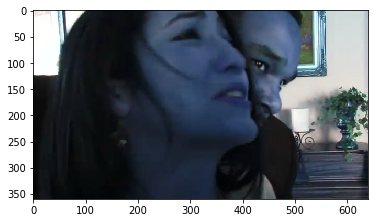

(64, 64, 3)


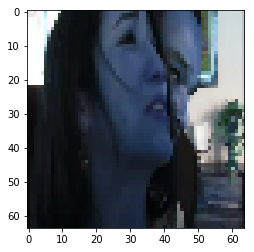

In [46]:
# load a frame from another movie
frame_num = 4001
vidcap = cv2.VideoCapture('./data_movies/MEDIAEVAL18_07.mp4')
vidcap.set(1, frame_num)
success, frame = vidcap.read()
if success:
    plt.imshow(frame)
    plt.show()
    
    # reshape it 
    img = cv2.resize(frame, (64,64))
    print(img.shape)

    # visualize it
    plt.imshow(img)
    plt.show()
    
    # normalize it
    img = img/255.0
    
else:
    print("that's not a valid frame")
    

In [47]:
# send this new image through the autoencoder

test_image = sess.graph.get_tensor_by_name("Placeholder:0")
# restore the operation sigmoid
sigmoid = sess.graph.get_tensor_by_name("Sigmoid:0")

output_images = sess.run(sigmoid, feed_dict={test_image: img[np.newaxis, :, :, :]})
output_images = output_images * 255
output_images = output_images.astype(np.uint8)

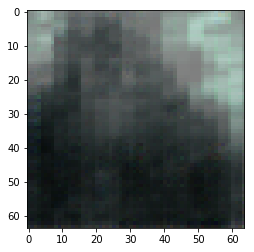

In [48]:
# viewing the output
plt.imshow(output_images[0])
plt.show()


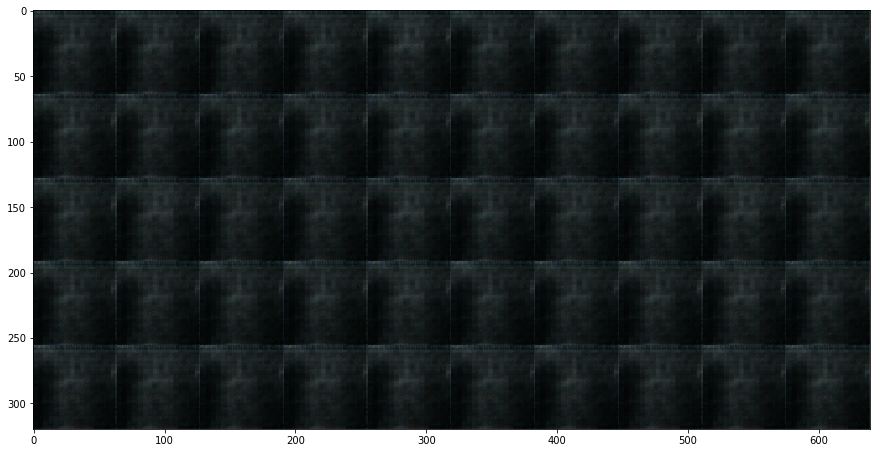

In [29]:
# visualize constructed output
# print out the reconstructed image
w = 10
h = 5
figure = np.zeros([64 * h, 64 * w, 3], dtype = np.uint8)
k = 0
for i in range(h):
    for j in range(w):
        image = np.reshape(output_images[k], [64, 64, 3])
        figure[i * 64: (i + 1) * 64,
               j * 64: (j + 1) * 64,
               :] = image
        k += 1
    
plt.figure(figsize=(15, 15))
plt.imshow(figure)
plt.show()